In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/Users/souhamsengupta/Downloads/filtered_masterdata.csv')
df.head()

,Unnamed: 0,study_id,series_id,instance_number,condition,level,x,y,severity,series_description
0,15,4003253,2448190387,3,Left Subarticular Stenosis,L1/L2,179.126448,161.235521,Normal/Mild,Axial T2
1,17,4003253,2448190387,11,Left Subarticular Stenosis,L2/L3,180.979730,158.764479,Normal/Mild,Axial T2
2,19,4003253,2448190387,19,Left Subarticular Stenosis,L3/L4,176.037645,157.528957,Normal/Mild,Axial T2
3,21,4003253,2448190387,28,Left Subarticular Stenosis,L4/L5,172.948842,156.911197,Moderate,Axial T2
4,23,4003253,2448190387,35,Left Subarticular Stenosis,L5/S1,179.744209,161.853282,Normal/Mild,Axial T2


In [4]:
df.shape

(6453, 10)

In [5]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0            0
study_id              0
series_id             0
instance_number       0
condition             0
level                 0
x                     0
y                     0
severity              5
series_description    0
dtype: int64

In [6]:
#Dropping missing values from multiple cols
df.dropna(subset=['study_id','series_id','instance_number','condition','level','x','y','severity','series_description'],inplace=True)

In [15]:
#Checking Duplicates
df.duplicated().sum()

0

In [16]:
#Data Types of the master data and its info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6448 entries, 0 to 6452
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          6448 non-null   int64  
 1   study_id            6448 non-null   int64  
 2   series_id           6448 non-null   int64  
 3   instance_number     6448 non-null   int64  
 4   condition           6448 non-null   object 
 5   level               6448 non-null   object 
 6   x                   6448 non-null   float64
 7   y                   6448 non-null   float64
 8   severity            6448 non-null   object 
 9   series_description  6448 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 554.1+ KB


In [2]:
#Some descriptive statistics (For numerical values)
df_all_master=pd.read_csv("/Users/souhamsengupta/Downloads/master_data.csv")
df_all_master.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,48692.0,2.434550e+04,1.405631e+04,0.000000e+00,1.217275e+04,2.434550e+04,3.651825e+04,4.869100e+04
study_id,48692.0,2.160244e+09,1.237310e+09,4.003253e+06,1.093392e+09,2.196441e+09,3.225352e+09,4.290709e+09
series_id,48692.0,2.154461e+09,1.244319e+09,1.099600e+04,1.069855e+09,2.163803e+09,3.242314e+09,4.294540e+09
instance_number,48692.0,1.340968e+01,5.658503e+01,1.000000e+00,7.000000e+00,1.100000e+01,1.500000e+01,5.046000e+03
x,48692.0,2.382375e+02,7.322643e+01,4.058824e+00,1.790681e+02,2.348362e+02,2.827327e+02,6.861903e+02
y,48692.0,2.330702e+02,9.248033e+01,2.063098e+00,1.647405e+02,2.191252e+02,2.897596e+02,8.018597e+02


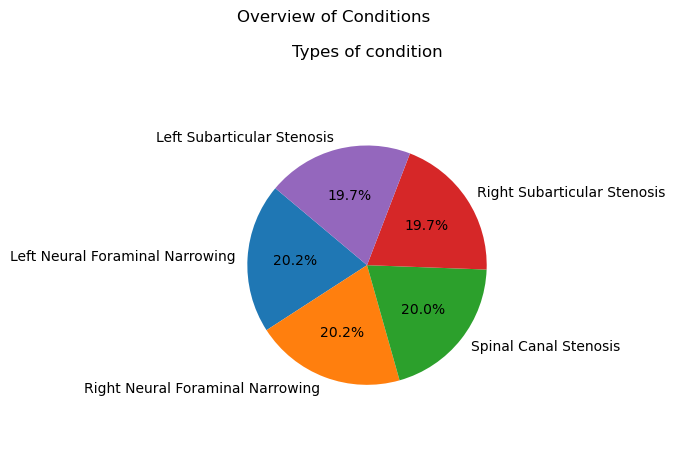

In [12]:
condition_count= df_all_master['condition'].value_counts()
condition_count


import matplotlib.pyplot as plt



# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Pie chart on one of the subplots, for example
ax.pie(condition_count, labels=condition_count.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Types of condition')
plt.axis('equal') 
plt.suptitle('Overview of Conditions')  # Sets title for the entire figure
plt.tight_layout()

plt.show()


In [18]:
#Descriptive stats for categorical values
condition_count= df['condition'].value_counts()
condition_count

condition
Left Subarticular Stenosis    6448
Name: count, dtype: int64

In [19]:
level_count= df['level'].value_counts()
level_count

level
L3/L4    1339
L4/L5    1339
L5/S1    1332
L2/L3    1260
L1/L2    1178
Name: count, dtype: int64

In [20]:
severity_count= df['severity'].value_counts()
severity_count

severity
Normal/Mild    3702
Moderate       1834
Severe          912
Name: count, dtype: int64

In [62]:
series_descriptionCount= df['series_description'].value_counts()
series_descriptionCount

series_description
Axial T2    6448
Name: count, dtype: int64

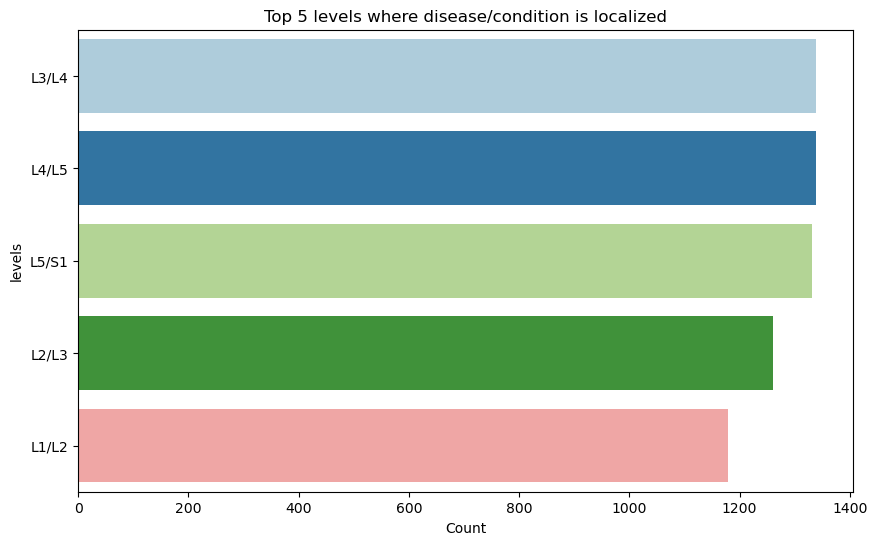

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_levels.values, y=top_levels.index, palette='Paired')
plt.xlabel('Count')
plt.ylabel('levels')
plt.title('Top 5 levels where disease/condition is localized')
plt.show()

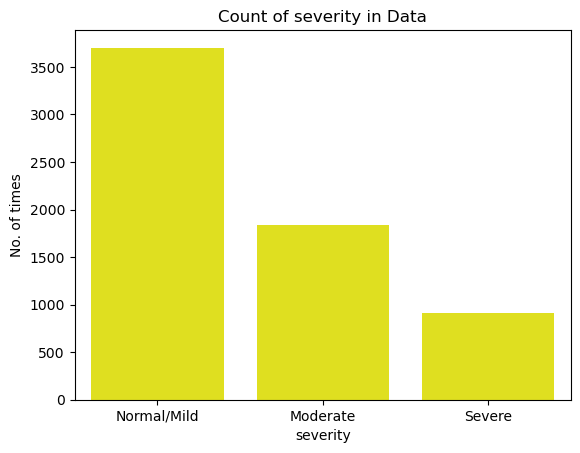

In [27]:
#Count plot for severity
sns.countplot(data=df, x='severity', color = 'yellow')
plt.title('Count of severity in Data')
plt.xlabel('severity')
plt.ylabel('No. of times')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:

dfle = df.copy()


columns_to_encode = ['condition', 'level', 'severity','series_description']


for i in columns_to_encode:
    le = LabelEncoder()
    dfle[i] = le.fit_transform(dfle[i])


print(dfle)


      Unnamed: 0    study_id   series_id  instance_number  condition  level  \
0             15     4003253  2448190387                3          0      0   
1             17     4003253  2448190387               11          0      1   
2             19     4003253  2448190387               19          0      2   
3             21     4003253  2448190387               28          0      3   
4             23     4003253  2448190387               35          0      4   
...          ...         ...         ...              ...        ...    ...   
6448       48657  4287160193  1820446240                4          0      4   
6449       48659  4287160193  1820446240                9          0      3   
6450       48661  4287160193  1820446240               16          0      2   
6451       48663  4287160193  1820446240               22          0      1   
6452       48665  4287160193  1820446240               28          0      0   

               x           y  severity  series_desc

In [64]:
#Correlation Matrix: Include all the numerical cols.
numerical_columns = dfle.select_dtypes(include=['number'])
cor = numerical_columns.corr()
cor

,Unnamed: 0,condition,level,x,y,severity,series_description
Unnamed: 0,1.000000,NaN,0.000593,0.001746,-0.005826,0.024079,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN
level,0.000593,NaN,1.000000,0.011511,-0.036634,-0.057579,NaN
x,0.001746,NaN,0.011511,1.000000,0.945576,0.011703,NaN
y,-0.005826,NaN,-0.036634,0.945576,1.000000,0.017486,NaN
severity,0.024079,NaN,-0.057579,0.011703,0.017486,1.000000,NaN
series_description,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df1=df.drop(columns=['condition','series_description'])
df1

,Unnamed: 0,study_id,series_id,instance_number,level,x,y,severity
0,15,4003253,2448190387,3,L1/L2,179.126448,161.235521,Normal/Mild
1,17,4003253,2448190387,11,L2/L3,180.979730,158.764479,Normal/Mild
2,19,4003253,2448190387,19,L3/L4,176.037645,157.528957,Normal/Mild
3,21,4003253,2448190387,28,L4/L5,172.948842,156.911197,Moderate
4,23,4003253,2448190387,35,L5/S1,179.744209,161.853282,Normal/Mild
...,...,...,...,...,...,...,...,...
6448,48657,4287160193,1820446240,4,L5/S1,145.703704,143.407407,Normal/Mild
6449,48659,4287160193,1820446240,9,L4/L5,143.925926,136.296296,Moderate
6450,48661,4287160193,1820446240,16,L3/L4,146.592593,149.037037,Moderate
6451,48663,4287160193,1820446240,22,L2/L3,144.814815,150.222222,Severe


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


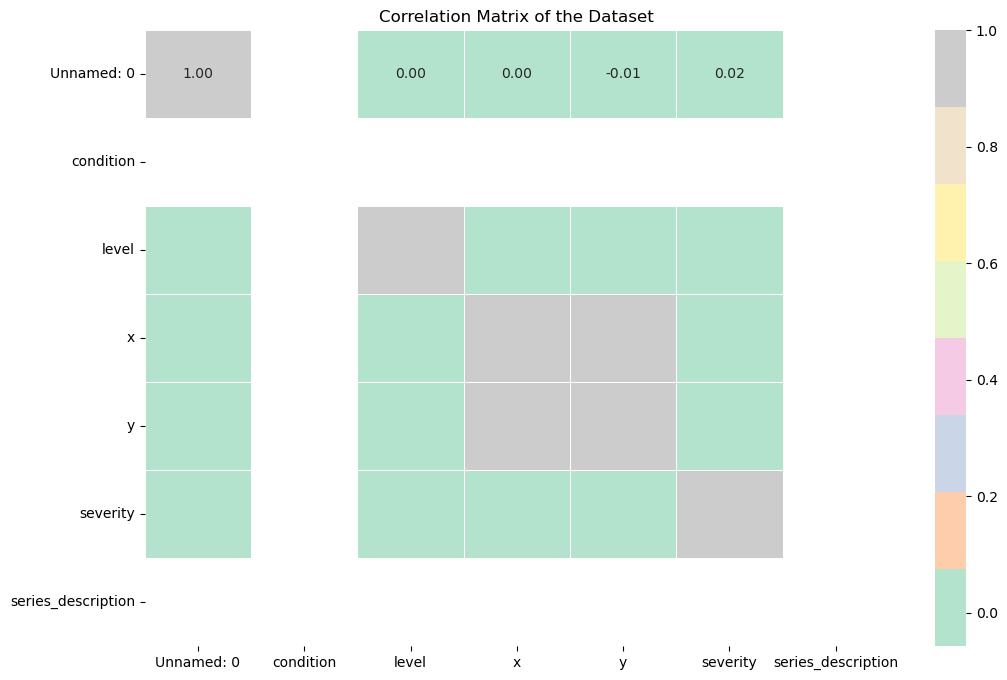

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='Pastel2', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of the Dataset')
plt.show()

In [46]:
#Relationship between other features and condition
numerical_columns = dfle.select_dtypes(include=np.number)
numerical_columns


,Unnamed: 0,condition,level,x,y,severity,series_description
0,15,0,0,179.126448,161.235521,1,0
1,17,0,1,180.979730,158.764479,1,0
2,19,0,2,176.037645,157.528957,1,0
3,21,0,3,172.948842,156.911197,0,0
4,23,0,4,179.744209,161.853282,1,0
...,...,...,...,...,...,...,...
6448,48657,0,4,145.703704,143.407407,1,0
6449,48659,0,3,143.925926,136.296296,0,0
6450,48661,0,2,146.592593,149.037037,0,0
6451,48663,0,1,144.814815,150.222222,2,0


In [55]:
df1=df.drop(columns=['condition'])
df1

,Unnamed: 0,study_id,series_id,instance_number,level,x,y,severity,series_description
0,15,4003253,2448190387,3,L1/L2,179.126448,161.235521,Normal/Mild,Axial T2
1,17,4003253,2448190387,11,L2/L3,180.979730,158.764479,Normal/Mild,Axial T2
2,19,4003253,2448190387,19,L3/L4,176.037645,157.528957,Normal/Mild,Axial T2
3,21,4003253,2448190387,28,L4/L5,172.948842,156.911197,Moderate,Axial T2
4,23,4003253,2448190387,35,L5/S1,179.744209,161.853282,Normal/Mild,Axial T2
...,...,...,...,...,...,...,...,...,...
6448,48657,4287160193,1820446240,4,L5/S1,145.703704,143.407407,Normal/Mild,Axial T2
6449,48659,4287160193,1820446240,9,L4/L5,143.925926,136.296296,Moderate,Axial T2
6450,48661,4287160193,1820446240,16,L3/L4,146.592593,149.037037,Moderate,Axial T2
6451,48663,4287160193,1820446240,22,L2/L3,144.814815,150.222222,Severe,Axial T2


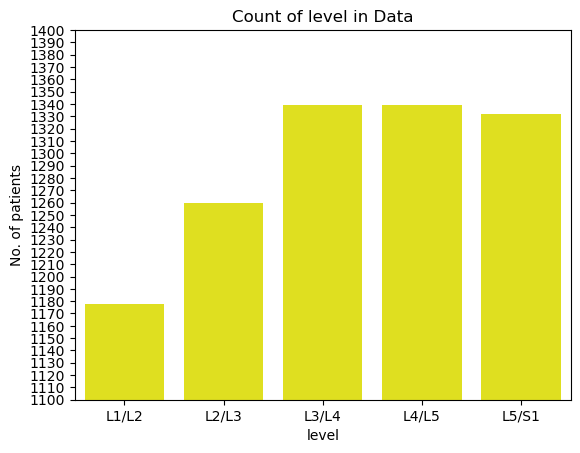

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot
sns.countplot(data=df1, x='level', color='yellow')

# Adding plot title and labels
plt.title('Count of level in Data')
plt.xlabel('level')
plt.ylabel('No. of patients')

# Setting the y-axis limits to focus between 1100 to 1400
plt.ylim(1100, 1400)

# Customizing the y-axis ticks for more sensitivity in the specified range
plt.yticks(range(1100, 1401, 10))  # Adjust the step for ticks as needed for better granularity

# Display the plot
plt.show()


In [59]:
df_Left_Subarticular_Stenosis=dfle[dfle['condition']==0]
df_Left_Subarticular_Stenosis

,Unnamed: 0,condition,level,x,y,severity,series_description
0,15,0,0,179.126448,161.235521,1,0
1,17,0,1,180.979730,158.764479,1,0
2,19,0,2,176.037645,157.528957,1,0
3,21,0,3,172.948842,156.911197,0,0
4,23,0,4,179.744209,161.853282,1,0
...,...,...,...,...,...,...,...
6448,48657,0,4,145.703704,143.407407,1,0
6449,48659,0,3,143.925926,136.296296,0,0
6450,48661,0,2,146.592593,149.037037,0,0
6451,48663,0,1,144.814815,150.222222,2,0


In [69]:
!pip install missingno


In [2]:
from glob import glob
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

competition_dataset_directory = Path('/Users/souhamsengupta/Downloads/rsna-2024-lumbar-spine-degenerative-classification')

In [4]:
train_images = glob(str(competition_dataset_directory / 'train_images' / '*' / '*' / '*.dcm'))

df_train = pd.read_csv(competition_dataset_directory / 'train.csv')
df_train_series_descriptions = pd.read_csv(competition_dataset_directory / 'train_series_descriptions.csv')
df_train_label_coordinates = pd.read_csv(competition_dataset_directory / 'train_label_coordinates.csv')

print(f'Training Images Count {len(train_images)}')
print(f'Training Set Shape: {df_train.shape}')
print(f'Train Series Descriptions Shape: {df_train_series_descriptions.shape}')
print(f'Train Label Coordinates Shape: {df_train_label_coordinates.shape}')

Training Images Count 147218
Training Set Shape: (1975, 26)
Train Series Descriptions Shape: (6294, 3)
Train Label Coordinates Shape: (48692, 7)


In [5]:
def visualize_condition_counts(df, title, path=None):
    
    """
    Visualize condition counts on training set
    
    Parameters
    ----------
    df: pandas.DataFrame
        Counts and percentages of conditions
        
    title: str
        Title of the plot
        
    path: str, pathlib.Path or None
        Path of the output file (if path is None, plot is displayed with selected backend)
    """
    
    fig, ax = plt.subplots(figsize=(24, 16))

    ax.barh(
        y=np.arange(df.shape[0] // 3) - 0.2,
        width=df['count'].values[0::3],
        height=0.2,
        align='center',
        label='Normal/Mild'
    )
    ax.barh(
        y=np.arange(df.shape[0] // 3),
        width=df['count'].values[1::3],
        height=0.2,
        align='center',
        label='Moderate'
    )
    ax.barh(
        y=np.arange(df.shape[0] // 3) + 0.2,
        width=df['count'].values[2::3],
        height=0.2,
        align='center',
        label='Severe'
    )

    ax.set_yticks(np.arange(df.shape[0] // 3))
    ax.set_yticklabels([
        f'{level}\nNormal Count: {normal_count} ({normal_percentage:.2f}%)\nModerate Count: {moderate_count} ({moderate_percentage:.2f}%)\nSevere Count: {severe_count} ({severe_percentage:.2f}%)' for level, normal_count, normal_percentage, moderate_count, moderate_percentage, severe_count, severe_percentage, in zip(
            df['level'].values[0::3],
            df['count'].values[0::3],
            df['percentage'].values[0::3],
            df['count'].values[1::3],
            df['percentage'].values[1::3],
            df['count'].values[2::3],
            df['percentage'].values[2::3],
        )
    ])
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=17.5, pad=10)
    ax.tick_params(axis='y', labelsize=17.5, pad=10)
    ax.set_title(title, size=20, pad=15)
    ax.legend(loc='best', prop={'size': 18})
    plt.gca().invert_yaxis()

    plt.show()

    if path is None:
        plt.show()
    else:
        plt.savefig(path)
        plt.close(fig)


In [10]:
subarticular_stenosis_columns = [column for column in df_train.columns if 'subarticular_stenosis' in column]
df_train_subarticular_stenosis = []

for column in subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'subarticular_stenosis'})
    df_train_subarticular_stenosis.append(df)
    
df_train_subarticular_stenosis = pd.concat(df_train_subarticular_stenosis, axis=0).reset_index(drop=True)

df_train_subarticular_stenosis_counts = df_train_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_subarticular_stenosis_counts['severity'] = df_train_subarticular_stenosis_counts['subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_subarticular_stenosis_counts = df_train_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_subarticular_stenosis_counts['percentage'] = df_train_subarticular_stenosis_counts['count'] / df_train_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100

left_subarticular_stenosis_columns = [column for column in df_train.columns if column.startswith('left_subarticular_stenosis')]
df_train_left_subarticular_stenosis = []

for column in left_subarticular_stenosis_columns:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_subarticular_stenosis'})
    df_train_left_subarticular_stenosis.append(df)
    
df_train_left_subarticular_stenosis = pd.concat(df_train_left_subarticular_stenosis, axis=0).reset_index(drop=True)

df_train_left_subarticular_stenosis_counts = df_train_left_subarticular_stenosis.groupby('level').value_counts().reset_index()
df_train_left_subarticular_stenosis_counts['severity'] = df_train_left_subarticular_stenosis_counts['left_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_subarticular_stenosis_counts = df_train_left_subarticular_stenosis_counts.sort_values(by=['level', 'severity'], ascending=True)
df_train_left_subarticular_stenosis_counts['percentage'] = df_train_left_subarticular_stenosis_counts['count'] / df_train_left_subarticular_stenosis_counts.groupby('level')['count'].transform('sum') * 100



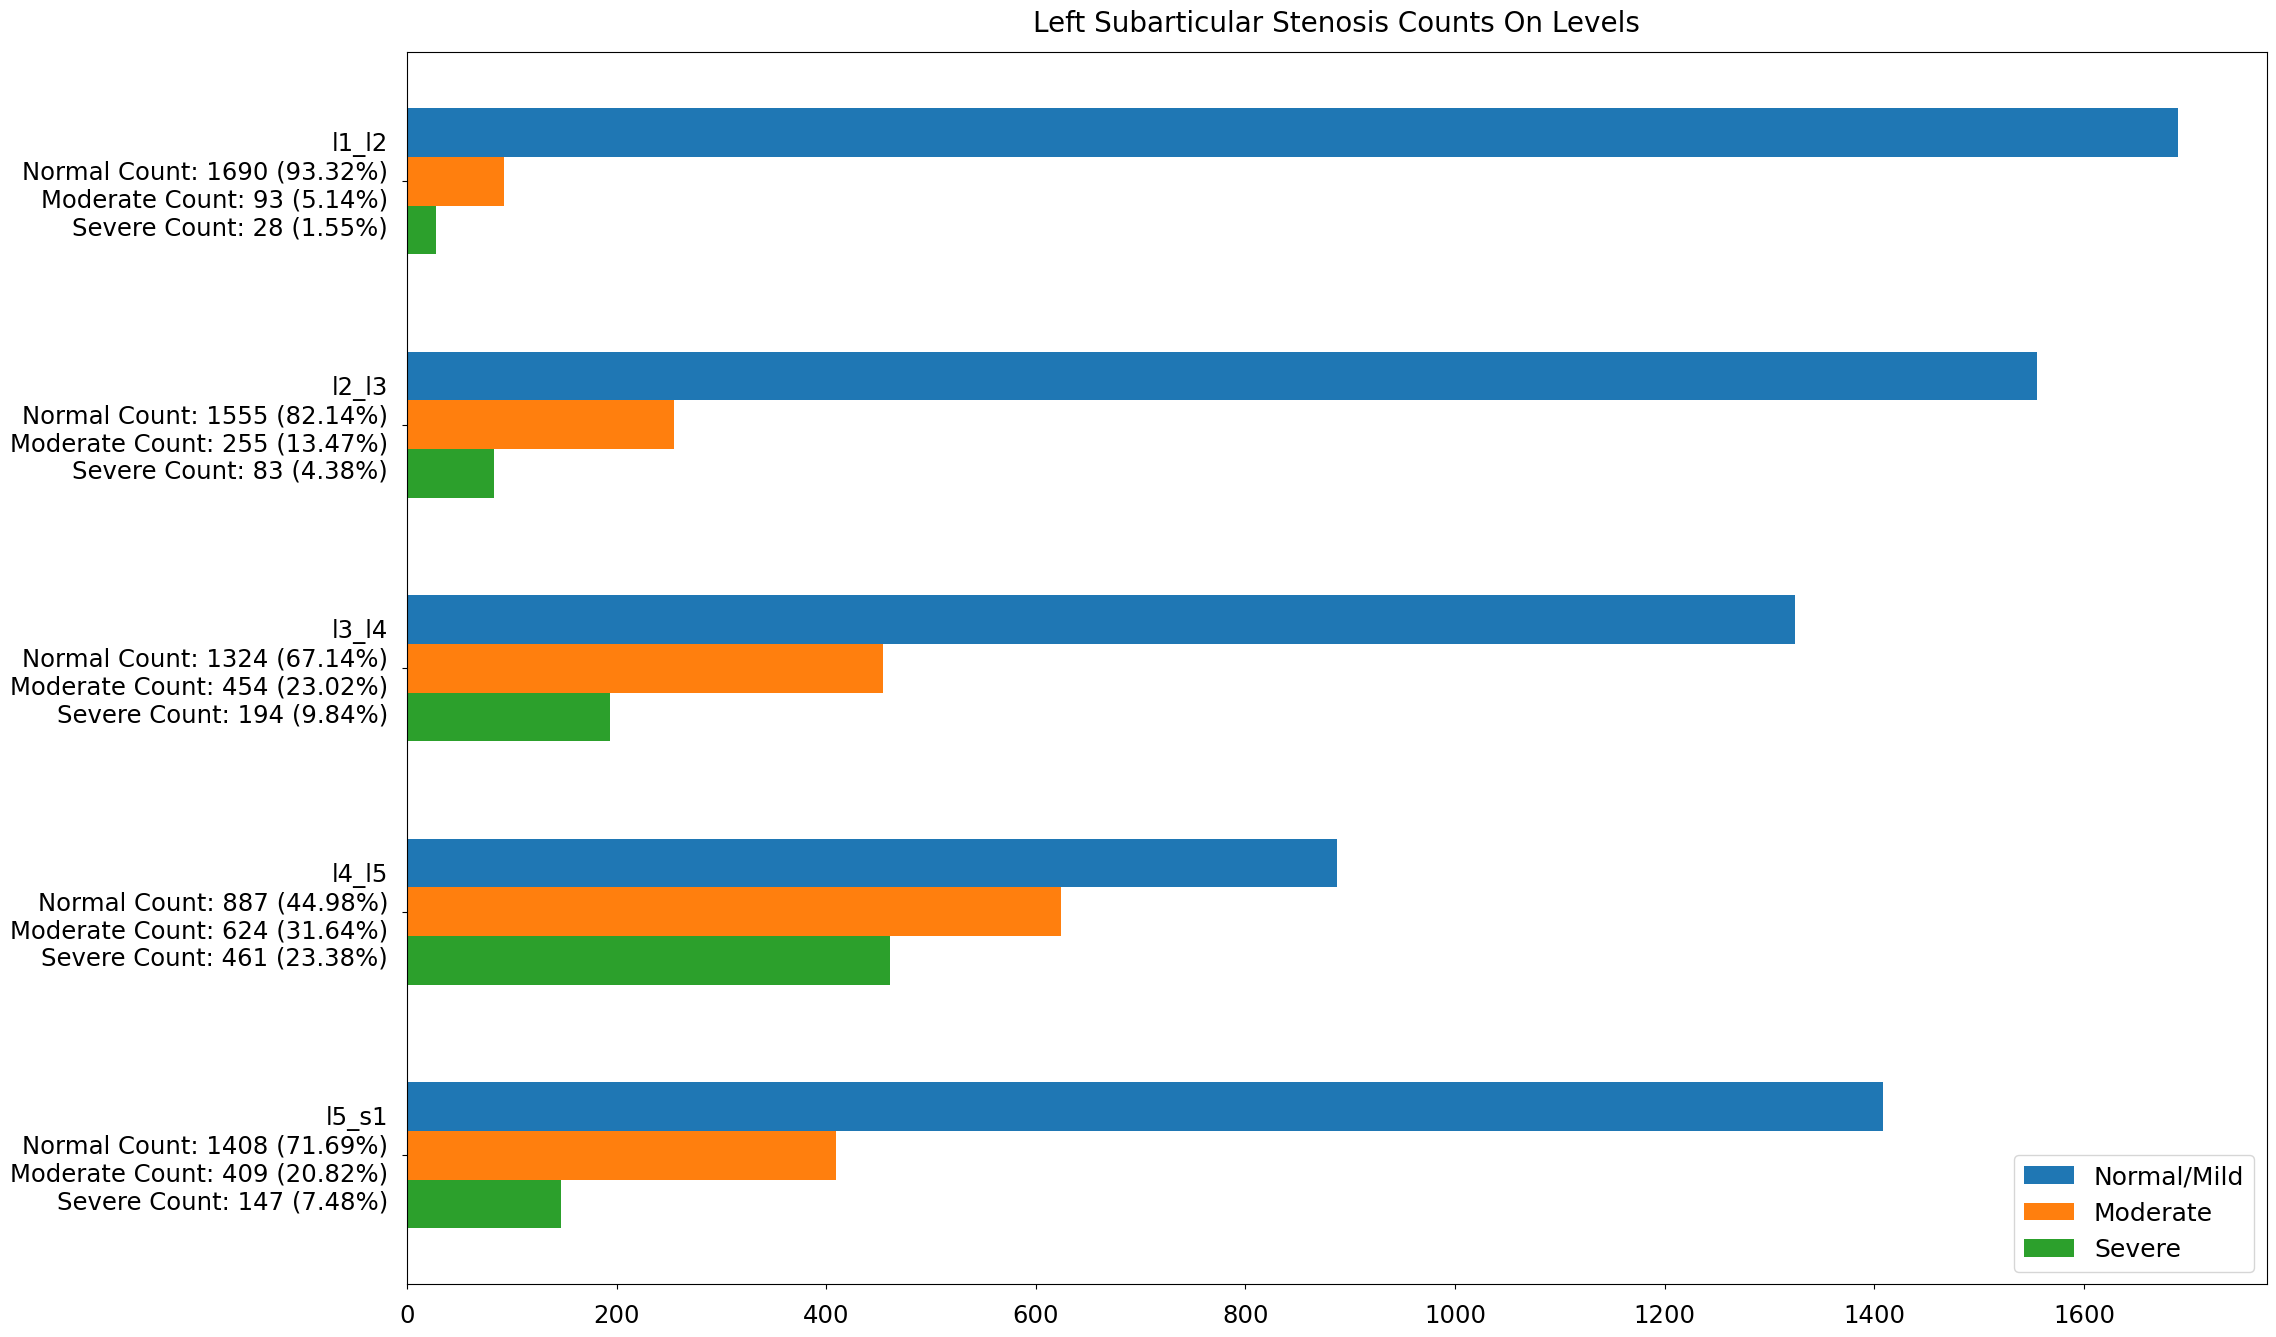

In [12]:


visualize_condition_counts(
    df=df_train_left_subarticular_stenosis_counts,
    title='Left Subarticular Stenosis Counts On Levels'
)



In [8]:
subarticular_stenosis_columns = [column for column in df_train.columns if 'subarticular_stenosis' in column]
df_train_left_right_subarticular_stenosis = []

for column in subarticular_stenosis_columns[:5]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'left_subarticular_stenosis'})
    df_train_left_right_subarticular_stenosis.append(df)

for column in subarticular_stenosis_columns[5:]:
    df = df_train[[column]].copy(deep=True)
    df['level'] = '_'.join(column.split('_')[-2:])
    df = df.rename(columns={column: 'right_subarticular_stenosis'})
    df_train_left_right_subarticular_stenosis.append(df)
    
df_train_left_right_subarticular_stenosis = pd.concat((
    pd.concat(df_train_left_right_subarticular_stenosis[:5], axis=0).reset_index(drop=True).iloc[:, :1],
    pd.concat(df_train_left_right_subarticular_stenosis[5:], axis=0).reset_index(drop=True)
), axis=1, ignore_index=False)

df_train_left_right_subarticular_stenosis['left_severity'] = df_train_left_right_subarticular_stenosis['left_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_subarticular_stenosis['right_severity'] = df_train_left_right_subarticular_stenosis['right_subarticular_stenosis'].map({
    'Normal/Mild': 0,
    'Moderate': 1,
    'Severe': 2
})
df_train_left_right_subarticular_stenosis['level_'] = df_train_left_right_subarticular_stenosis['level'].map({
    'l1_l2': 0,
    'l2_l3': 1,
    'l3_l4': 2,
    'l4_l5': 3,
    'l5_s1': 4
})

In [9]:
df_subarticular_stenosis_correlations = df_train_left_right_subarticular_stenosis[['level_', 'left_severity', 'right_severity']].corr()
display(df_subarticular_stenosis_correlations)

,level_,left_severity,right_severity
level_,1.000000,0.236914,0.245518
left_severity,0.236914,1.000000,0.581930
right_severity,0.245518,0.581930,1.000000
